Determine the factors that contribute the most in the calculation of insurance costs.
Predict the health Insurance Cost.


Find the correlation of every pair of features (and the outcome variable).
Visualize the correlations using a heatmap.
Normalize your inputs.
Use the test data to find out the accuracy of the model.
Visualize how your model uses the different features and which features have a greater effect.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data_insaurance=pd.read_csv("insurance2.csv")

In [4]:
data_insaurance.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
data_insaurance.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
corr=data_insaurance.corr()

<AxesSubplot:>

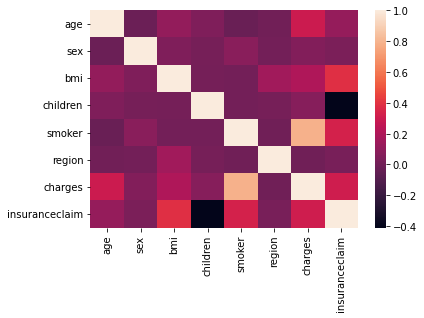

In [9]:
sns.heatmap(corr)

In [16]:
X_feature=data_insaurance.iloc[:,:-1]
Y_target=data_insaurance.iloc[:,-1:]

In [167]:
X_train,X_test,Y_train,Y_test=train_test_split(X_feature,Y_target,test_size=0.2,random_state=2)

In [168]:
log_reg=LogisticRegression()

In [169]:
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [170]:
y_predict=log_reg.predict(X_test)

In [171]:
accuracy=accuracy_score(Y_test,y_predict)*100

In [172]:
accuracy

86.94029850746269

Text(0.5, 0, 'Importance')

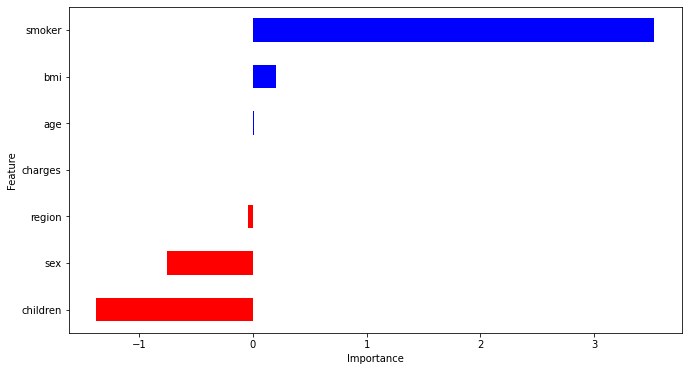

In [183]:
coeff=log_reg.coef_[0]
labels=(data_insaurance.drop('insuranceclaim',1).columns)
feature=pd.DataFrame()
feature['Feature']=labels
feature['Importance']=coeff
feature.sort_values(by=['Importance'],ascending=True,inplace=True)
feature['Positive']=feature['Importance']>0
feature.set_index('Feature', inplace=True)
feature.Importance.plot(kind='barh', figsize=(11, 6),color = feature.Positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')